# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`) 

👇 Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡 Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [127]:
import pandas as pd

data = pd.read_csv("../data/houses.csv")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [128]:
livecode_data = data[['GrLivArea','SalePrice']]

#livecode_data.head()
# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)), visualize the relationship between the living areas and the sale prices.

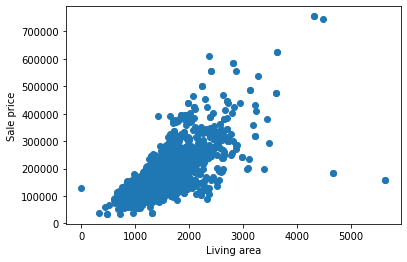

In [4]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()).item(),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_variables.py::TestVariables::test_variable_X PASSED           [ 50%]
tests/test_variables.py::TestVariables::test_variable_y PASSED           [100%]

============================== 2 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master


## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [25]:
from sklearn.model_selection import cross_validate
# Import the model
from sklearn.linear_model import LinearRegression


# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])

In [26]:
cv_results

{'fit_time': array([0.00390792, 0.00269866, 0.00226855, 0.00229812, 0.00249648]),
 'score_time': array([0.00282025, 0.00161386, 0.00177026, 0.00161672, 0.00172281]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [18]:
# Min of scores
min_score = cv_results['test_score'].min()
min_score

0.3911751008901019

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [19]:
# Max of scores
max_score = cv_results['test_score'].max()
max_score

0.5581065677255257

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [20]:
# Mean of scores
mean_score = cv_results['test_score'].mean()
mean_score

0.4863112208425962

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_cv_results.py::TestCvResults::test_cv_max PASSED              [ 25%]
tests/test_cv_results.py::TestCvResults::test_cv_mean PASSED             [ 50%]
tests/test_cv_results.py::TestCvResults::test_cv_min PASSED              [ 75%]
tests/test_cv_results.py::TestCvResults::test_cv_results PASSED          [100%]

============================== 4 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master


👇 Plot the evolution of
- the **total computational time** (fitting time + scoring time)
- and the **average score** of the K folds...

as K folds increases from 2 until 40.

In [21]:
cv_results

{'fit_time': array([0.00447798, 0.00336933, 0.00256252, 0.0029614 , 0.00278378]),
 'score_time': array([0.00179529, 0.00189543, 0.00164413, 0.00180411, 0.00280595]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

In [104]:

test_scores = []
time_scores = []
for i in range(2, 41):
    cv_results = cross_validate(model1, X, y, cv=i)
    test_scores.append(cv_results['test_score'].mean())
    time_scores.append(cv_results["fit_time"].sum() + cv_results["score_time"].sum())
    

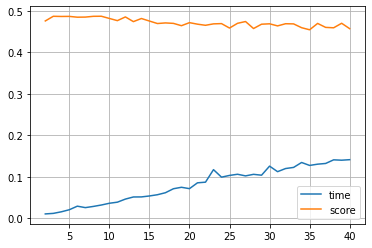

In [108]:

plt.plot(range(2,41), time_scores, label = "time")
plt.plot(range(2,41), test_scores, label = "score")
plt.legend()
plt.grid()

ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [110]:
# Train the model on the data
model = model.fit(X, y)

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [112]:

slope = model.coef_ 
slope

array([105.00927564])

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [113]:
# View the model's intercept (b)
intercept = model.intercept_ 
intercept

22104.12101002081

### ☑️ Test your code

In [114]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_trained_model.py::TestTrainedModel::test_intercept PASSED     [ 50%]
tests/test_trained_model.py::TestTrainedModel::test_slope PASSED         [100%]

============================== 2 passed in 0.63s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master


## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

In [130]:
y1 = slope*X + intercept
y1

,GrLivArea
0,201669.982347
1,154625.826862
2,209650.687295
3,202405.047276
4,252914.508857
...,...
1755,239788.349403
1756,140239.556100
1757,194319.333052
1758,256169.796402


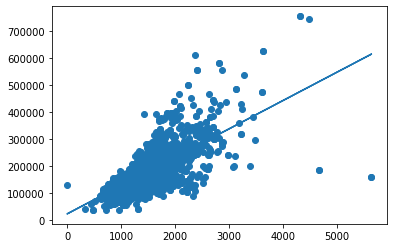

In [131]:
plt.plot(X,y1)
plt.scatter(X,y)


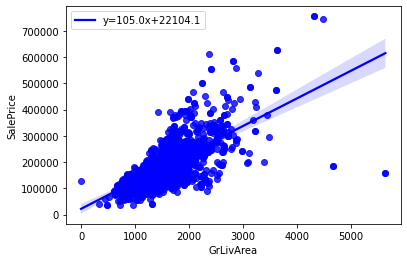

In [145]:
import seaborn as sns
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data['GrLivArea'],data['SalePrice'])

# use line_kws to set line label for legend
ax = sns.regplot(x=X, y=y, data=data, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [147]:
# Train the model on the data


prediction = model.predict([[1500]])
prediction

/home/lewagon/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([179618.0344634])

### ☑️ Test your code

In [148]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/lewagon/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagon/code/nikkordalis/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁